# FINAL 	PROJECT - Yummy Yelpers

### Group 39 Members:
- Katherine Ninh - A13021553
- Connie Su - A12207049
- Katherine Le - A12255247
- Kevin Sy - A13666356
- Kevan Yang - A12768844
- Mark Choe - A13917840


## Introduction and Background

#### Research Question
<i> Does proximity to an original food source in the U.S. affect the ratings of a restaurant inspired by this food source? As you go further from the source, will the restaurant ratings of that cuisine become worse? </i>

Since living and attending school in San Diego, students have been blessed with authentic and delicious Mexican cuisines- perhaps because of our distance from Mexico itself. From personal experience, members of our team noticed that Mexican food quality in Southern California is superior to that in Northern California, concluding that proximity from Mexico influences the quality of the food. So, we questioned if proximity from original food source in North America affects the ratings of the restaurant inspired by their food source. Seeing if this hypothesis holds true for other cuisines, like seafood, will further test our hypothesis. 

Since the creation of Yelp in 2004, business nationwide and worldwide have the ability to promote their business while interacting with their customers through reviews. Yelp is one of the leading customer review websites, averaging 29 million unique visitors on the Yelp app and 64 million unique visitors on the Yelp website  (https://www.yelp.com/about). To see if our hypothesis is true, we will be utilizing star ratings from Yelp to determine whether location determines quality of a restaurant's food.

#### Hypothesis
 Our hypothesis for Mexican restaurants is that ratings will decline as the Mexican restaurants travel further from Mexico. Additionally, we predict that seafood restaurant ratings will decline as seafood restaurants move further from large bodies of water, like the coasts. 
 
This is important because customers would be able to see what restaurants are good in particular regions. Also, a company like Yelp could see how much power a restaurant rating has for that business. This tool could be used for small restaurant businesses in determining where they should build their restaurant location. So, our data would help  determine how close or far away a restaurant should be placed to be successful.

## Data Description:
#### Yelp Data (General):
The Yelp business dataset consists of the business names, neighborhoods, addresses, cities, states, postal codes, latitudes, longitudes, star ratings, price ranges, number of reviews, categories, closed and open statuses, hours, parking, and business IDs. Aside from the relevant categories utilized to narrow the businesses in the dataset, the latitudes, longitudes, and star ratings are the most relevant for our project. The latitudes and longitudes of the businesses are important in determining the distances of restaurants from the corresponding restaurant’s food source. The star ratings of the businesses are important in determining the quality of the food at restaurants. Along with these more relevant datasets, our project also utilizes the price ranges to account for any potential confounding variables or inaccurate reviews.
#### Yelp Data (Star Ratings):
We will be using the Yelp star ratings to find out the quality of the restaurants to quantify how “good” a restaurant’s food is. The ratings will go from 1 being the poorest to 5 being the best. It should be noted that the Yelp dataset records the review scores in increments of 0.5. So, there are scores such as 3.5 and 4.5, but not scores such as 3.2 and 4.7.
#### Yelp Data (Locations based on Latitudes and Longitudes):
We will be using the latitudes and longitudes to identify where the restaurants are located. We will then use these locations to determine the distances of restaurants from either the Mexican border or the nearest massive body of water.
#### Yelp Data (Price Ranges):
The price range is an estimate of the cost a single person’s meal, which includes a drink, tax, as well as tip. We will not be using restaurants with a price range above $60.00 (indicated by four dollar signs in the restaurant description), because we assume these restaurants will have much better food quality in general compared to the other restaurants and thus might affect our conclusion.


## Data Cleaning/Pre-Processing:
#### Criteria we filter for:
* Location: US (Atlantic Ocean + Gulf of Mexico + Pacific Ocean + Mexican border)
* Categories: Restaurant
* Price: 1-3 dollar signs

Before using the Yelp dataset for analysis, we need to filter the Yelp reviews by the criteria listed above. We want to analyze Yelp reviews that are within United States so that our data will be more centralized. The Yelp dataset also contains reviews of all types of businesses such as hair salons. So, we will filter it out based on categories such as “food”. 
We don’t want the cost of the food to impact the review. In order to reduce the factor that money has on food quality, we will narrow down our reviews to restaurants that ranges from 1-3 dollar signs (low to medium cost for food). In addition, the Yelp dataset will have columns dropped that are not useful to our particular project, such as “business name”, “business parking” or “hours”. 


In [341]:
#Import all packages needed
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os
from branca.utilities import split_six
import scipy
import statsmodels.api as sm
from mpl_toolkits.basemap import Basemap
from IPython.display import Image, display

#Here we load the data
df_business = pd.read_json("business.json", date_unit="ns", lines=True )
print(df_business.categories)
print(df_business.shape)

0         [Dentists, General Dentistry, Health & Medical...
1         [Hair Stylists, Hair Salons, Men's Hair Salons...
2         [Departments of Motor Vehicles, Public Service...
3                                [Sporting Goods, Shopping]
4         [American (New), Nightlife, Bars, Sandwiches, ...
5                                    [Italian, Restaurants]
6         [Real Estate Services, Real Estate, Home Servi...
7                                [Shopping, Sporting Goods]
8           [Coffee & Tea, Ice Cream & Frozen Yogurt, Food]
9                              [Automotive, Auto Detailing]
10        [Breakfast & Brunch, Gluten-Free, Coffee & Tea...
11                           [Local Services, Self Storage]
12                                 [Bakeries, Bagels, Food]
13        [General Dentistry, Dentists, Endodontists, Co...
14                    [Restaurants, American (Traditional)]
15                           [Italian, French, Restaurants]
16                             [Beauty &

In [342]:
"""Data Cleaning"""
#filtering data into restaurants in the US, then Mexican restaurants and seafood restaurants

#Functions to be used below
#filter down businesses to only restaurants
def filterRestaurants(l):
    if "Food" in l:
        return True
    else:
        return False
    
#filter Mexican Restaurants
def isMexican(l):
    if "Mexican" in l:
        return True
    else:
        return False

#filter Seafood Restaurants
def hasSeafood(l):
    if "Seafood" in l:
        return True
    else:
        return False

#In US - list of states in US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

#Applying functions to dataframes
#In US - filtering out restaurants not in US
df_business = df_business.loc[df_business['state'].isin(states)]

#Filter restaurants
df_business['Restaurant'] = df_business.categories.apply(filterRestaurants)
df_business = df_business[df_business['Restaurant'] == True]

#Create data frame for Mexican restaurants
df_business['Mexican'] = df_business.categories.apply(isMexican)
df_mexican = df_business[df_business["Mexican"] == True]

#Create data frame for Seafood restaurants
df_business["Seafood"] = df_business.categories.apply(hasSeafood)
df_seafood = df_business[df_business["Seafood"] == True]

#prices - function for filtering price ranges
#If there's no price range then nan
def getPriceRange(d):
    if u'RestaurantsPriceRange2' in d:
        return d[u'RestaurantsPriceRange2']
    else:
        return np.nan



In [343]:
#Create data frame for Mexican restaurants
df_business['Mexican'] = df_business.categories.apply(isMexican)
df_mexican = df_business[df_business["Mexican"] == True]

#filtering prices
df_mexican['price range'] = df_mexican["attributes"].apply(getPriceRange)
df_mexican.dropna(subset=['price range'], inplace=True)
df_mexican = df_mexican[(df_mexican['price range'] == 1) | (df_mexican['price range'] == 2) | (df_mexican['price range'] == 3)]

#drop unnecessary columns
df_mexican = df_mexican.drop(['categories', 'Mexican', 'Restaurant', 'Seafood', 'attributes', 'name', 'postal_code', 'address', 'is_open', 'hours', 'business_id', 'neighborhood'], 1)

#reorder necessary columns
mex_columns = ['city', 'state', 'latitude', 'longitude', 'price range', 'review_count', 'stars']
df_mexican = df_mexican[mex_columns]

C:\Anaconda\envs\py361\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\envs\py361\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [344]:
#Create data frame for Seafood restaurants
df_business["Seafood"] = df_business.categories.apply(hasSeafood)
df_seafood = df_business[df_business["Seafood"] == True]

#filtering prices
df_seafood['price range'] = df_seafood["attributes"].apply(getPriceRange)
df_seafood.dropna(subset=['price range'], inplace=True)
df_seafood = df_seafood[(df_seafood['price range'] == 1) | (df_seafood['price range'] == 2) | (df_seafood['price range'] == 3)]

#drop unnecessary columns
df_seafood = df_seafood.drop(['categories', 'Mexican', 'Restaurant', 'Seafood', 'attributes', 'name', 'postal_code', 'address', 'is_open', 'hours', 'business_id', 'neighborhood'], 1)

#reorder necessary columns
sea_columns = ['city', 'state', 'latitude', 'longitude', 'price range', 'review_count', 'stars']
df_seafood = df_seafood[sea_columns]

C:\Anaconda\envs\py361\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\envs\py361\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [345]:
print(df_business.columns)
print ("Mexican Restaurants")
print (df_mexican.head(10))
print ("Seafood Restaurants")
print (df_seafood.head(10))
print ("")
print(str(df_mexican.shape[0]) + " Mexican Restaurants") #383 Mexican restaurants
print(str(df_seafood.shape[0]) + " Seafood Restaurants") #183 Seafood restaurants

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state', 'Restaurant',
       'Mexican', 'Seafood'],
      dtype='object')
Mexican Restaurants
                   city state   latitude   longitude  price range  \
117   Cleveland Heights    OH  41.500586  -81.592278          2.0   
629           Las Vegas    NV  36.124902 -115.134710          3.0   
951           Charlotte    NC  35.199187  -80.841455          1.0   
1160          Las Vegas    NV  36.160004 -115.118578          2.0   
1481          Las Vegas    NV  36.219146 -115.251757          2.0   
1521            Gilbert    AZ  33.377308 -111.789086          1.0   
1740          Las Vegas    NV  36.129696 -115.137255          1.0   
1996          Charlotte    NC  35.242273  -80.937658          1.0   
2306            Phoenix    AZ  33.451070 -112.055957          1.0   
2886            Madison

## Data Visualization/Analysis:

First we are going to make a visualization of the distribution of ratings and Mexican/Seafood restaurants in the U.S. After cleaning the Yelp data set from 100,000+ businesses, we end up with 383 Mexican restaurants and 183 Seafood restaurants to analyze data from. 

We will also print the total number of Mexican and Seafood restaurants in the U.S with relation to their star rating.

Text(0.5,1,'Star Rating Distrubition')

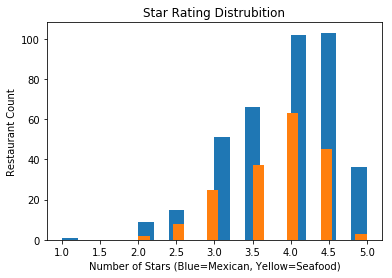

In [346]:
#Taking a look at distributions of ratings for seafood and mexican restaurants
plt.hist(df_mexican["stars"], bins=20)
plt.hist(df_seafood["stars"], bins=20)
plt.xlabel("Number of Stars (Blue=Mexican, Yellow=Seafood)")
plt.ylabel("Restaurant Count")
plt.title("Star Rating Distrubition")

For our Data Visualization, we're going to be visualizing both Mexican and Seafood Restaurants. For clarity, we will separate the two and explain each. Each graph will be labeled and the description/analysis will be below the graph.

### Mexican Restaurants - Distance from Border
- We use the latitudes of the restaurants to determine the distances of restaurants from the Mexican border by subtracting the latitude of the Mexican border (approximately 28N) from the latitudes of the restaurants. These distances end up ranging from 2 degrees to 18 degrees, and help visualize the distribution of Mexican restaurant ratings.

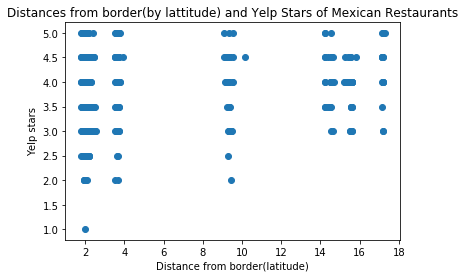

In [347]:
#distance from Mexico - right now it's just distance north from border by latitude, an approximation

#approximate longitude and latitude of border
mexBorder = {-117:32.5, -116:32.5, -115:32.5, 114:-32.2, -113:32.0, -112:31.6, -111:31.2, -110:31.2, -109:31.2, -108:31.7,
            -107:31.7, -106:31.4, -105:30.6, -104:29.4, -103:29.1, -102:29.8, -101:29.3, -100:28.1, -99:26.3, -98:25.9, -97:25.9}

def distanceNorth(long, lat):
    if int(long) in mexBorder:
        return lat - mexBorder[int(long)];
    else:
        return lat - 25.9;
    
def applyDistanceNorth(row):
    return distanceNorth(row['longitude'], row['latitude'])

#Finding and adding distances to dataframe
distances = df_mexican.apply(applyDistanceNorth, axis=1)
df_mexican["distance"] = distances
plt.scatter(df_mexican["distance"], df_mexican["stars"])
plt.xlabel("Distance from border(latitude)")
plt.ylabel("Yelp stars")
plt.title("Distances from border(by lattitude) and Yelp Stars of Mexican Restaurants")

plt.show()

- This graph shows a decrease in Mexican restaurant as we get further away from the equator and also a decrease in 5-star yelp reviews. Restaurants further from the border have less 5 star ratings than those that are closer to the border.
- Analysis: There is a higher variance in the scores of Yelp reviews as restaurants are closer to the border. One possible reasoning for this is that people may be better at judging the quality of the Mexican restaurant as the people have a better sense of the authenticity of Mexican food. People that are closer to the border may have a higher standard in terms of Mexican food quality. There is also a higher number of Mexican restaurants closer to the border. This added competition may cause some Mexican restaurants to receive low star ratings as they are simply outclassed by the surrounding competition.

### Seafood Restaurants - Distance from Nearest Coast

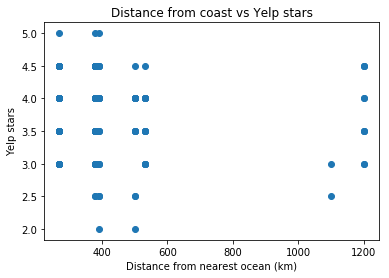

In [348]:
#approximate distance from ocean is based on state(since data focused on a few cities)
oceanDistances = {"NV":380, "AZ":270, "WI":1200, "IL":1100, "OH": 530, "NC":390, "PA":500}


def apprDistanceFromOcean(state):
    if state in oceanDistances:
        return oceanDistances[state]
    else:
        return -1
    
def applyDistanceOcean(row):
    return apprDistanceFromOcean(row['state'])

#Finding and adding distances to dataframe
distances = df_seafood.apply(applyDistanceOcean, axis=1)
df_seafood["distance"] = distances
plt.scatter(df_seafood["distance"], df_seafood["stars"])
plt.title("Distance from coast vs Yelp stars")
plt.xlabel("Distance from nearest ocean (km)")
plt.ylabel("Yelp stars")
plt.show()

- We approximated the distance from the restaurants to an approximate point on the coasts (whatever the nearest ocean is) and found that the closer it was to the coast, the more restaurants there were. At 400 km away from the coast, there was a peak of restaurant amount and ratings. As we get farther away from the coasts (1200km), there were no five star restaurants. 

### Mexican Restaurants - Ratings Vs. Distance

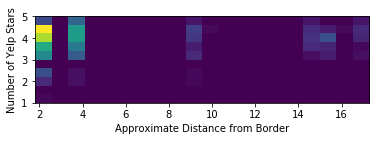

dict_keys([15, 3, 9, 2, 1, 17, 14, 10])


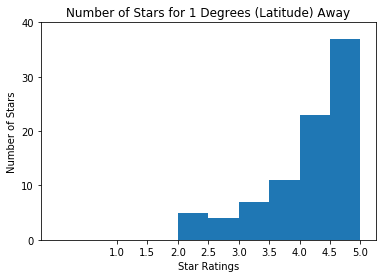

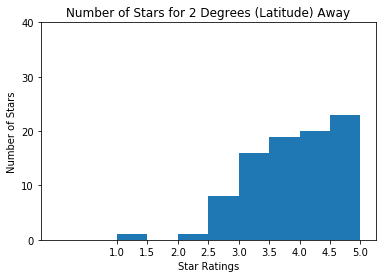

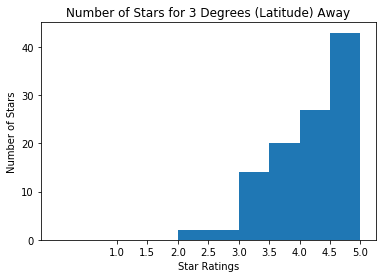

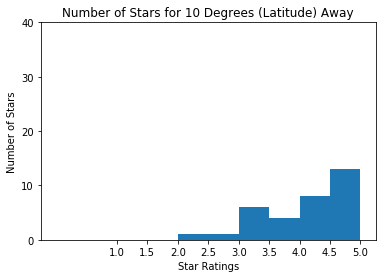

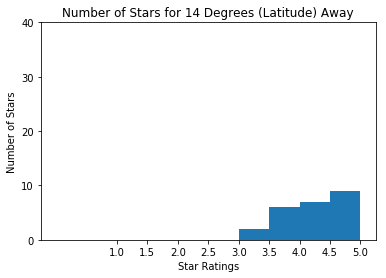

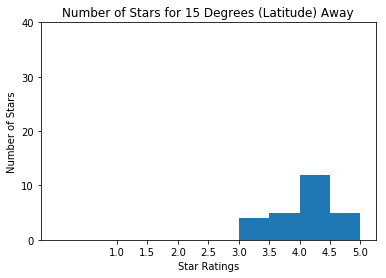

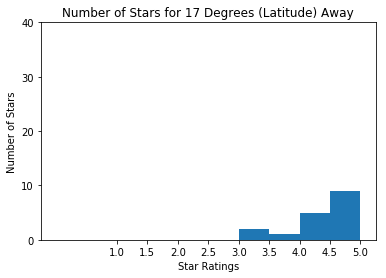

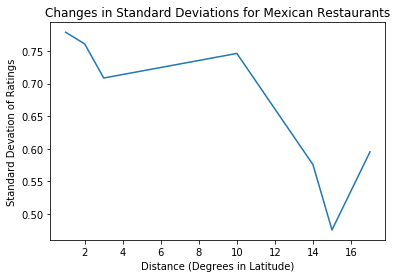

In [349]:
#heatmap of distances and ratings
pairs = []
for index, row in df_mexican.iterrows():
    pairs.append((row['distance'], row['stars']))

heatmap, xedges, yedges = np.histogram2d(df_mexican['distance'], df_mexican['stars'], bins=(20,10))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel("Approximate Distance from Border")
plt.ylabel("Number of Yelp Stars")
plt.show()

#histograms of distances
mex_distanceGroups = {}

for index, row in df_mexican.iterrows():
    ad = int(row['distance'])
    if not ad in mex_distanceGroups:
        mex_distanceGroups[ad] = []
    mex_distanceGroups[ad].append(row['stars'])

mex_sortedDistances = []
for distance in mex_distanceGroups:
    mex_sortedDistances.append(distance)

#Grouping data of North and South Carolina. Refer to Data Analysis and results for why we did this.

print(mex_distanceGroups.keys())
mex_distanceGroups[10] = mex_distanceGroups[10] + mex_distanceGroups[9]
mex_sortedDistances.remove(9)

mex_sortedDistances.sort()
mex_sdList = []
mex_distanceMeans = []

#plotting distributions of ratings for different distance groups
for distance in mex_sortedDistances:
    plt.hist(mex_distanceGroups[distance], bins=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
    plt.title("Number of Stars for " + str(distance) + " Degrees (Latitude) Away")
    plt.xlabel("Star Ratings")
    plt.ylabel("Number of Stars")
    #~69 miles, 111/degree latitude
    plt.xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
    plt.yticks([0,10,20,30,40])
    plt.show()
    
    sd = np.std(mex_distanceGroups[distance])
    mex_sdList.append(sd)
    mex_distanceMeans.append(np.mean(mex_distanceGroups[distance]))

#Plotting how standard deviations change for different distance groups
plt.plot(mex_sortedDistances, mex_sdList)
plt.xlabel("Distance (Degrees in Latitude)")
plt.ylabel("Standard Devation of Ratings")
plt.title("Changes in Standard Deviations for Mexican Restaurants")
plt.show()

The heat map shows the quantity of restaurants in a particular distance from the border based off of rating. These bar graphs show that as we get farther away (in degrees latitude) from the Mexican border, there are less overall restaurants and the number and quality of ratings also go down.

### Seafood Restaurants - Ratings Vs. Distance

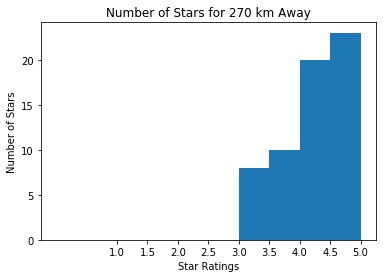

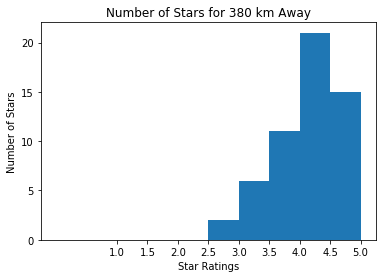

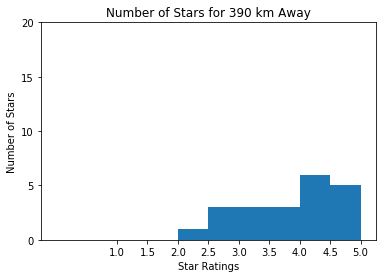

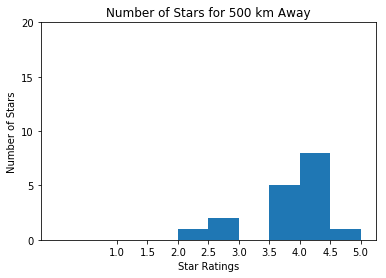

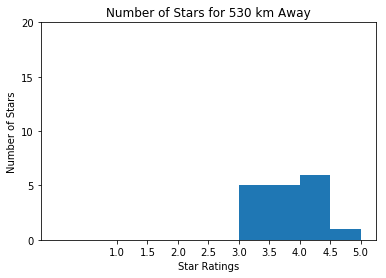

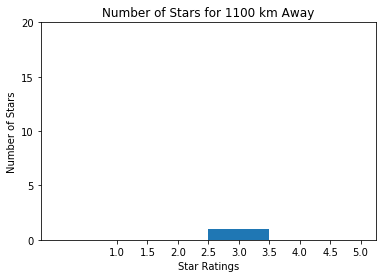

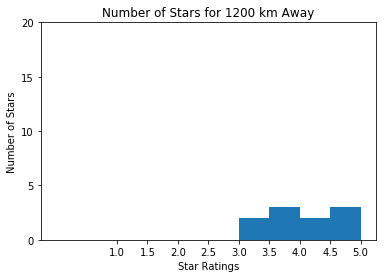

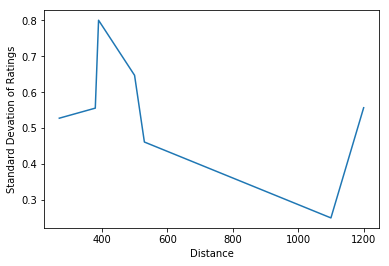

In [350]:
#histograms of distances
sea_distanceGroups = {}
sea_distanceMeans = []

for index, row in df_seafood.iterrows():
    ad = int(row['distance'])
    if not ad in sea_distanceGroups:
        sea_distanceGroups[ad] = [] 
    sea_distanceGroups[ad].append(row['stars'])
sea_sortedDistances = []
for distance in sea_distanceGroups:
    sea_sortedDistances.append(distance)
    
sea_sortedDistances.sort()
sea_sdList = []

#plotting distributions of ratings for different distance groups
for distance in sea_sortedDistances:
    sea_distanceMeans.append(np.mean(sea_distanceGroups[distance]))
    plt.hist(sea_distanceGroups[distance], bins=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
    plt.title("Number of Stars for " + str(distance) + " km Away")
    plt.xlabel("Star Ratings")
    plt.ylabel("Number of Stars")
    #~69 miles, 111/degree latitude
    plt.xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
    plt.yticks([0,5,10,15,20])
    plt.show()
    
    sd = np.std(sea_distanceGroups[distance])
    sea_sdList.append(sd)

#plotting how standard deviations change for different distance groups
plt.plot(sea_sortedDistances, sea_sdList)
plt.xlabel("Distance")
plt.ylabel("Standard Devation of Ratings")
plt.show()

These bar graphs show that as we get farther away (in kilometers) from the nearest coast, there are less overall restaurants and the number and quality of ratings also go down.

## Map Visualization of Data (State Averages)
We made the maps below using Folium and have PNG Images just in case they don't run.

In [351]:
#Mexican food average ratings map

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

#Grouping restaurants and their ratings by state
statesUsed = []
stateGroups = {}
stateAvg = {}
stateMedian = {}
for index, row in df_mexican.iterrows():
    state = row['state']
    if not state in stateGroups:
        stateGroups[state] = []
        statesUsed.append(state)
    stateGroups[state].append(int(row['stars']))

for state in states:
    if state in stateGroups:
        stateAvg[state] = np.mean(stateGroups[state])
        stateMedian[state] = np.median(stateGroups[state])

state1 = []
state2 = []
for x in stateAvg:
    state1.append(x)
    state2.append(stateAvg[x])
    
#Plotting ratings on map by state averages from dataset
state_data = pd.DataFrame({'State':state1, 'Avg':state2})
state_data = state_data[['State', 'Avg']]
print(state_data)
map2 = folium.Map(location=[40.013570,-100.466407], zoom_start=4)
map2.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=state_data,
    columns=['State', 'Avg'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=0.2,
)


folium.LayerControl().add_to(map2)

map2

  State       Avg
0    AZ  3.537143
1    IL  3.900000
2    NV  3.761468
3    NC  3.600000
4    OH  3.653846
5    PA  3.714286
6    SC  4.500000
7    WI  4.000000


In [352]:
#Seafood average ratings map
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

#Grouping restaurants and their ratings by state
statesUsed = []
stateGroups = {}
stateAvg = {}
stateMedian = {}
for index, row in df_seafood.iterrows():
    state = row['state']
    if not state in stateGroups:
        stateGroups[state] = []
        statesUsed.append(state)
    stateGroups[state].append(int(row['stars']))

for state in states:
    if state in stateGroups:
        stateAvg[state] = np.mean(stateGroups[state])
        stateMedian[state] = np.median(stateGroups[state])

state1 = []
state2 = []
for x in stateAvg:
    state1.append(x)
    state2.append(stateAvg[x])

#Plotting ratings on map by state averages from dataset
state_data = pd.DataFrame({'State':state1, 'Avg':state2})
state_data = state_data[['State', 'Avg']]
print(state_data)
map4 = folium.Map(location=[40.013570,-100.466407], zoom_start=4)
map4.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=state_data,
    columns=['State', 'Avg'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=0.2,
)


folium.LayerControl().add_to(map4)

map4

  State       Avg
0    AZ  3.721311
1    IL  2.500000
2    NV  3.636364
3    NC  3.380952
4    OH  3.411765
5    PA  3.352941
6    WI  3.500000


## Mexican Restaurants - Average Rating per State (PNG IMAGE)

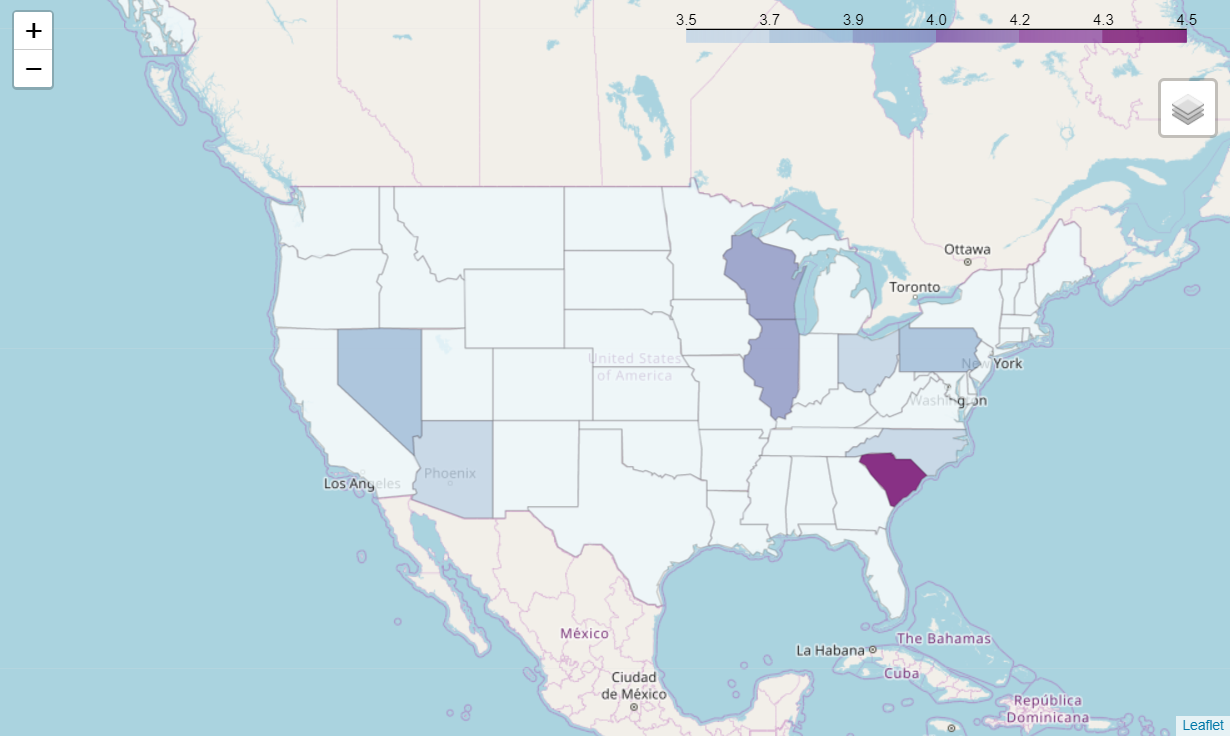

In [353]:
display(Image(filename='./MexicanFoodStateAverages.png'))

This map from Folium shows us the general distribution of the ratings across the whole state for Mexican Restaurants.

## Seafood Restaurants - Average Rating per State (PNG IMAGE)

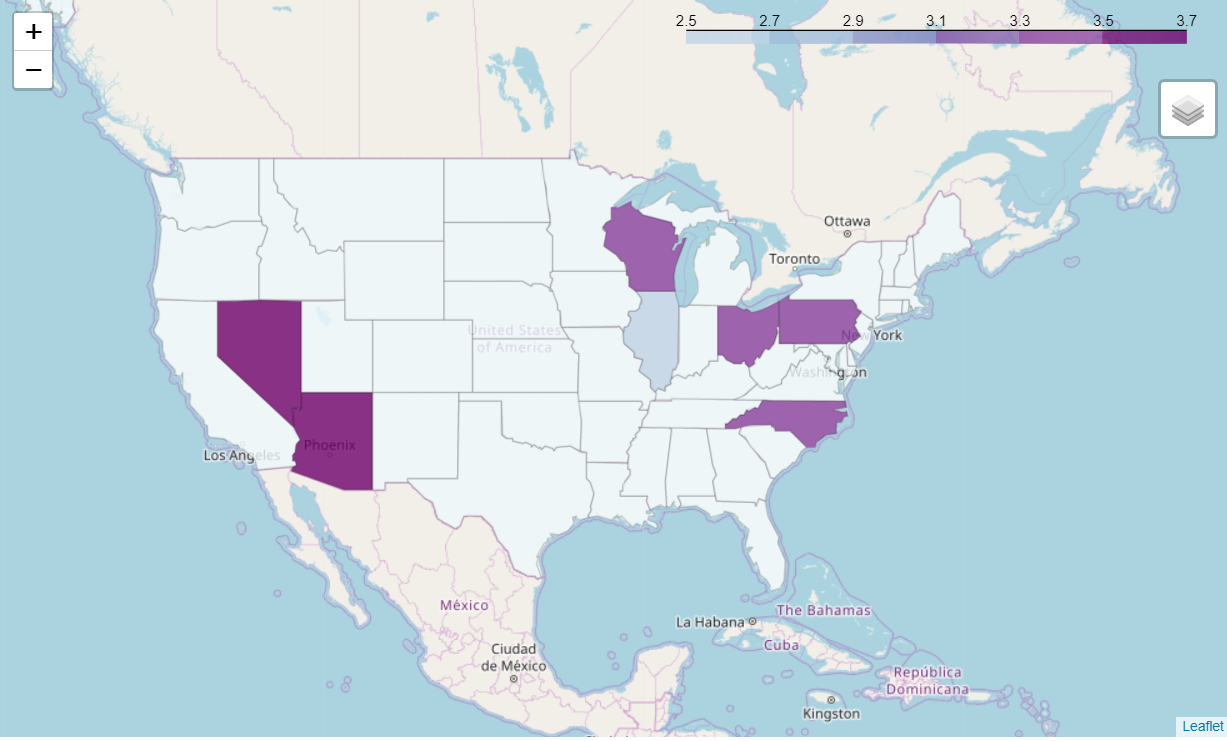

In [354]:
display(Image(filename='./SeafoodStateAverages.png'))

This map from Folium shows us the general distribution of the ratings across the whole state for Seafood Restaurants.

### More Visualization with Additional Maps and Scatterplots

To visualize the ratings distribution more, we will graph the Folium map in a different way.

In [355]:
# Maps functions
# Assumes Earth is flat
# Getting the average location point and rating
def avgLatLon(df, state):
    # get all rows that have specific state
    df_state = df[df['state'] == state]
    
    # calculate average ratings of a state
    avg_stars = df_state['stars'].mean()
    
    # calculate average of latitude and longitude
    lat = df_state['latitude'].values
    lon = df_state['longitude'].values
    
    avg_lat = np.mean(lat)
    avg_lon = np.mean(lon)
    return avg_lat, avg_lon, avg_stars

# plot all average location points labeled with average ratings on a geographic map of US
def mapAvgPlotRatings(m, lons, lats, ratings):
    # calculate map projection coordinates 
    x, y = m(lons, lats)
    
    # round the ratings to two decimal places
    l = []
    for r in ratings:
        s = round(r, 2)
        l.append(s)
    
    # plots average points
    m.scatter(x, y, marker="D")
    
    # labels points with average ratings
    i = 0
    for star, p1, p2 in zip(l, x, y):
        if i % 2 == 0:
            plt.text(p1+10000, p2 +5000, star)
        else:
            plt.text(p1-25000, p2 -50000, star)
        i += 1

# Get average location points and ratings for Mexican restaurants
avg_mex_lons = []
avg_mex_lats = []
avg_mex_stars = []
for m in df_mexican["state"].unique():
    x, y, r = avgLatLon(df_mexican, m)
    avg_mex_lons.append(y)
    avg_mex_lats.append(x)
    avg_mex_stars.append(r)

# Get average location points and ratings for seafood restaurants
avg_sea_lons = []
avg_sea_lats = []
avg_sea_stars = []
for s in df_seafood["state"].unique():
    x, y, r = avgLatLon(df_seafood, s)
    avg_sea_lons.append(y)
    avg_sea_lats.append(x)
    avg_sea_stars.append(r)

### Mexican Restaurants 

### Map of Average Points of Mexican Restaurants by State

C:\Anaconda\envs\py361\lib\site-packages\mpl_toolkits\basemap\__init__.py:4991: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):


Average Points for Mexican Restaurants of Each State


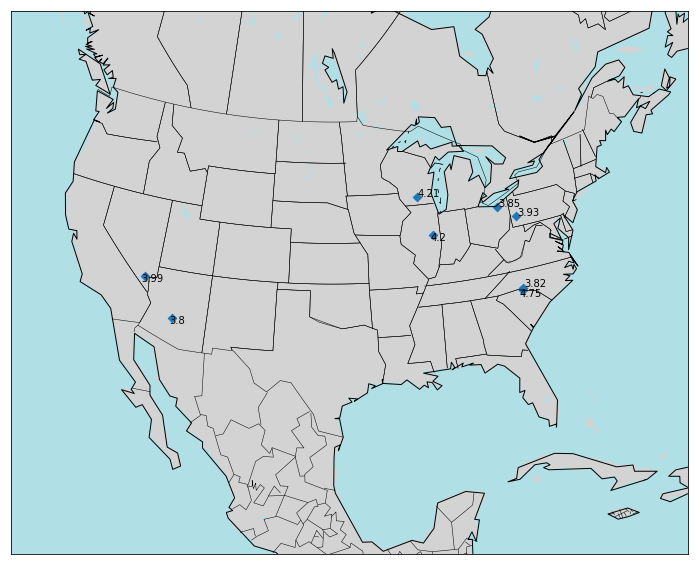

In [356]:
# creates map with average points of mexican restaurants by state
plt.figure(figsize=(13,10))
mex_avg = Basemap(llcrnrlon=-120, llcrnrlat=15, urcrnrlon=-55, urcrnrlat=50,
              projection='lcc', lat_1=30., lat_2=60., lat_0=50, lon_0=-98.)
mex_avg.drawcoastlines()
mex_avg.drawcountries()
mex_avg.drawstates()
mex_avg.drawlsmask(land_color="lightgray",ocean_color="powderblue")

mapAvgPlotRatings(mex_avg, avg_mex_lons, avg_mex_lats, avg_mex_stars)

print ("Average Points for Mexican Restaurants of Each State")
plt.show()

In this graph, we showed the organization of the cities that is in our dataset to be able to visualize our data more. By plotting these points, we see that the data points are concentrated in seven states. We’re comparing city to city instead of individual restaurants. 

In [357]:
# code for all scatterplots later 
# plots restaurants by state and color-code by ratings
# darker the dots the higher the ratings
def plotRatings(ratings, df, y, state=""):
    plt.subplot(y)
    colors = {1.0:'#f7fcfd', 1.5:'#e5f5f9', 2.0:'#ccece6', 2.5:'#99d8c9', 3.0:'#66c2a4', 
              3.5:'#41ae76', 4.0:'#238b45', 4.5:'#006d2c', 5.0:'#00441b'}
    
    # for each rating, plot the restaurants and color-code based on 'colors' list
    for r in ratings:
        if state == "":
            df_star = df[df['stars'] == r]
        else:
            df_star = df.loc[(df['stars'] == r) & (df['state'] == state)]
        x = df_star['longitude'].values
        y = df_star['latitude'].values
        plt.scatter(x, y, color=colors[r], label=str(r))
    
    # if state is specified, create title as state abbreviation for plot 
    if ( state != ""):
        plt.title(state)
    
    #Label x and y axis
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    plt.tight_layout()

### Scatterplot of Mexican Restaurants using Latitude and Longitude

Mexican Restaurants with Price Ranges $-$$
(The darker the dots, the higer the ratings)


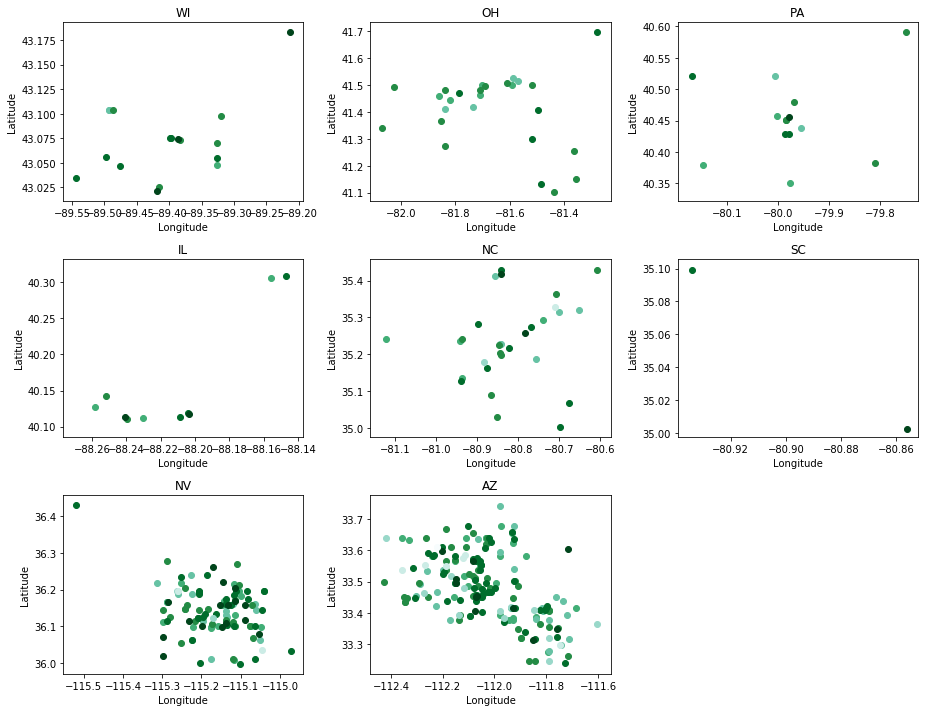

In [358]:
# create all mexican restaurant scatter plots by state
plt.figure(figsize=(13,10))

# reorder scatter plots by state
mex_states = ['WI', 'OH', 'PA', 'IL', 'NC', 'SC', 'NV', 'AZ']

y = 331
for s in mex_states:    
    plotRatings(df_mexican['stars'].unique(), df_mexican, y, state=s)
    y += 1

print ("Mexican Restaurants with Price Ranges $-$$")
print ("(The darker the dots, the higer the ratings)")
plt.show()

This scatter plot tells us more about the individual ratings in each city and allows us to visualize each individual cities’ restaurant ratings. We can tell that the amount and quality of restaurants decreases as we get further away from the border. 

### Seafood Restaurants

### Map of Average Points of Seafood Restaurants by State

C:\Anaconda\envs\py361\lib\site-packages\mpl_toolkits\basemap\__init__.py:4991: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):


Average Points for Seafood Restaurants of Each State


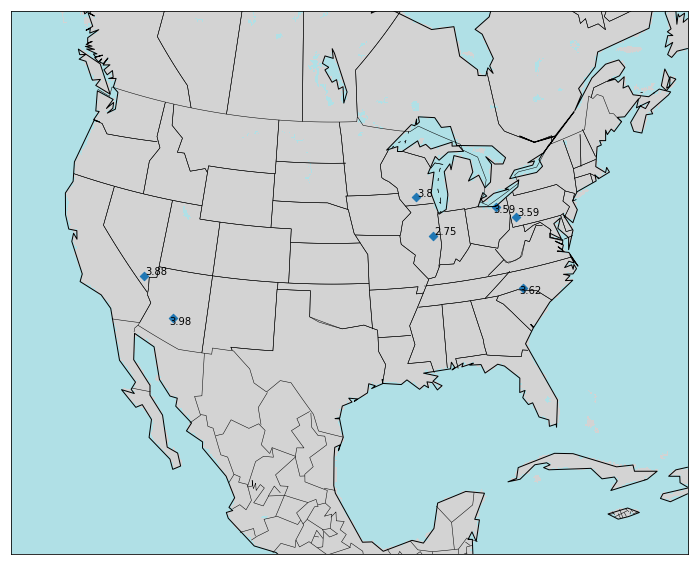

In [359]:
# creates map with average points of seafood restaurants by state
plt.figure(figsize=(13,10))
sea_avg = Basemap(llcrnrlon=-120, llcrnrlat=15, urcrnrlon=-55, urcrnrlat=50,
              projection='lcc', lat_1=30., lat_2=60., lat_0=50, lon_0=-98.)
sea_avg.drawcoastlines()
sea_avg.drawcountries()
sea_avg.drawstates()
sea_avg.drawlsmask(land_color="lightgray",ocean_color="powderblue")

mapAvgPlotRatings(sea_avg, avg_sea_lons, avg_sea_lats, avg_sea_stars)

print ("Average Points for Seafood Restaurants of Each State")
plt.show()

### Scatterplot of Seafood Restaurants using Latitude and Longitude

Seafood Restaurants with Price Ranges $-$$$
(The darker the dots, the higer the ratings)


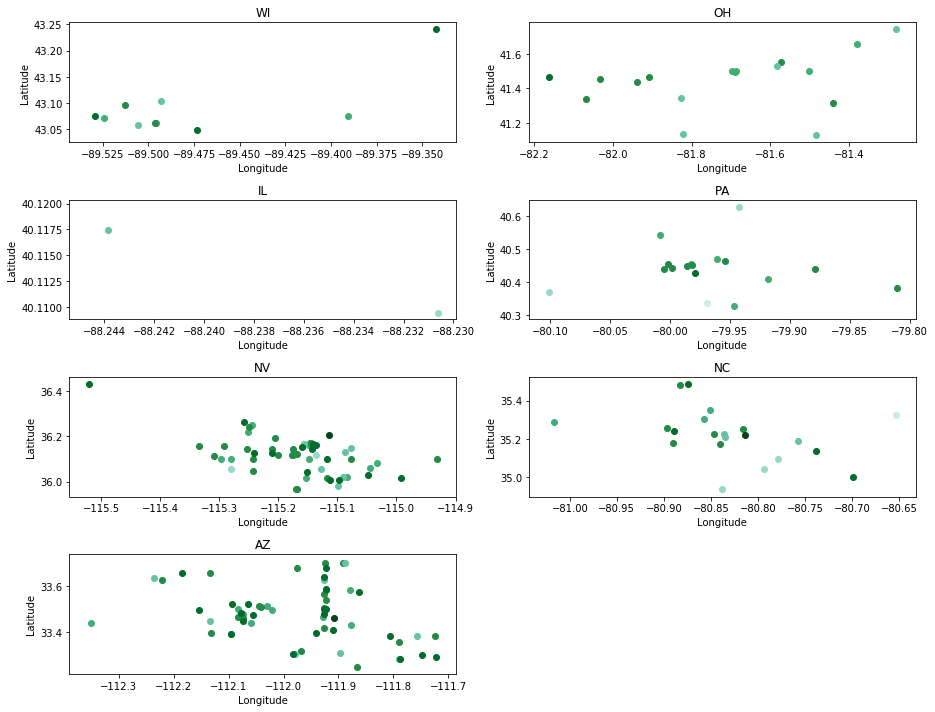

In [360]:
# create all seafood restaurant scatter plots by state
plt.figure(figsize=(13,10))

# reorder scatter plots by state
sf_states = ['WI', 'OH', 'IL', 'PA', 'NV', 'NC', 'AZ']

y = 421
for s in sf_states:    
    plotRatings(df_seafood['stars'].unique(), df_seafood, y, state=s)   
    y += 1

print ("Seafood Restaurants with Price Ranges $-$$$")
print ("(The darker the dots, the higer the ratings)")
plt.show()

This scatter plot tells us more about the individual ratings in each city and allows us to visualize each individual cities’ restaurant ratings. We can tell that the amount and quality of restaurants decreases as we get further away from the border. 

## Data Analysis and Results

Using the data that we have so far, we can analyze correlation between restaurant ratings and distance from food source by graphing linear regression to create the best fit line. Before we get into the graphing, we wanted to justify some decisions that we made.

### Why We took the Mean of City Yelp Reviews
We took the mean of a city’s restaurant Yelp reviews as we were more concerned with the overall sentiment of the restaurant reviews at certain distances than with the individual restaurants themselves. If we were to look at individual restaurants, we would effectively be giving more weight to distances with more restaurants and less weight to distances with less restaurants. Within a city (or cluster), individual restaurants' distance between one another is negligible given the scope of our dataset, the entire US. With regards to our research, the distance between cities and the border or body of water is more significant than the distances between individual restaurants within any one city. 

### Why We Combined NC and SC as One Data Point
The mean was calculated with the intention of averaging the cluster of restaurant ratings. So, the boundaries of states wasn’t our concern. We were more concerned with the overall sentiment of the cluster of restaurants. The 2 data points in South Carolina were close enough to North Carolina’s data points so we combined them into one data point. The degree of latitude and longitude difference for which we consider to be a cluster is ~1.5 degrees. Additionally, since South Carolina only has 2 data points, it would be unfair to represent it as its own state.

In [361]:
# Function to get the predicted linear regression lines below

def predictedRatings(xlist, m, b):
    r = []
    for i in xlist:
        r.append(m*i+b)
    return r

### Mexican Restaurant + Distance Correlation

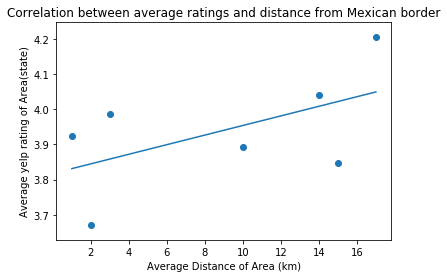

R: 0.5539868427104118
P-value: 0.19692828498619733


In [362]:
#Scatterplot of state averages and prediction line
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mex_sortedDistances, mex_distanceMeans)
plt.scatter(mex_sortedDistances, mex_distanceMeans)
plt.plot(mex_sortedDistances, predictedRatings(mex_sortedDistances, slope, intercept))
plt.xlabel("Average Distance of Area (km)")
plt.ylabel("Average yelp rating of Area(state)")
plt.title("Correlation between average ratings and distance from Mexican border")
plt.show()

print("R: " + str(r_value))
print("P-value: " + str(p_value))

In [363]:
mex_X = np.asarray(mex_sortedDistances)
mex_X = sm.add_constant(mex_X)

mex_Y = np.asarray(mex_distanceMeans)
mex_result = sm.OLS(mex_Y, mex_X).fit()
print ("Average Distance and Ratings for Mexican Restaurant")
print (mex_result.summary())

Average Distance and Ratings for Mexican Restaurant
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2.214
Date:                Wed, 21 Mar 2018   Prob (F-statistic):              0.197
Time:                        20:37:54   Log-Likelihood:                 4.4266
No. Observations:                   7   AIC:                            -4.853
Df Residuals:                       5   BIC:                            -4.961
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


C:\Anaconda\envs\py361\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


- n (Number of Samples) = 7
- Alpha level = 0.05
- df (Degrees of Freedom) = 5
- r (Pearson Product-Moment Correlation) = 0.554


- Null Hypothesis: There is no correlation between a Mexican restaurant’s distance from the Mexican border and the quality of that restaurant’s food.
- Alternative Hypothesis: There is a correlation between a Mexican restaurant’s distance from the Mexican border and the quality of that restaurant’s food.


- Results: After combining the data points of North and South Carolina, we plot the points of n = 7 location data points and found the Pearson product-moment correlation. The test statistic, r = 0.554 indicates that there is a strong positive correlation in this graph. However when performing the linear regression test, we fail to reject our null hypothesis because our test statistic, r = 0.554 is less than our critical value of rcritical = 0.755 (based upon the Pearson correlation level of significance table). Since we fail to reject our null hypothesis, we are saying that there is not enough evidence to provide whether or not there is no correlation. 

### Seafood Restaurant + Distance Correlation

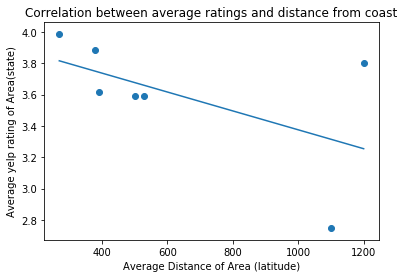

R: -0.5496964941443718
P-value: 0.20115262581242893


In [364]:
#Scatterplot of state averages and prediction line
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(sea_sortedDistances, sea_distanceMeans)
plt.scatter(sea_sortedDistances, sea_distanceMeans)
plt.plot(sea_sortedDistances, predictedRatings(sea_sortedDistances, slope, intercept))
plt.xlabel("Average Distance of Area (latitude)")
plt.ylabel("Average yelp rating of Area(state)")
plt.title("Correlation between average ratings and distance from coast")
plt.show()

print("R: " + str(r_value))
print("P-value: " + str(p_value))

In [365]:
sea_X = np.asarray(sea_sortedDistances)
sea_X = sm.add_constant(sea_X)

sea_Y = np.asarray(sea_distanceMeans)
sea_result = sm.OLS(sea_Y, sea_X).fit()
print ("Average Distance and Ratings for Seafood Restaurant")
print (sea_result.summary())

Average Distance and Ratings for Seafood Restaurant
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     2.165
Date:                Wed, 21 Mar 2018   Prob (F-statistic):              0.201
Time:                        20:37:55   Log-Likelihood:                -1.8264
No. Observations:                   7   AIC:                             7.653
Df Residuals:                       5   BIC:                             7.545
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


C:\Anaconda\envs\py361\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


* n (Number of Samples) = 7
* Alpha level = 0.05
* df (Degrees of Freedom) = 5
* r (Pearson Product-Moment Correlation) = -0.550


- Null Hypothesis: There is no correlation between a seafood restaurant distance from its nearest  water source and the quality of that restaurant's food.
- Alternative Hypothesis: There is a correlation between a seafood restaurants’ distance from its nearest water source and the quality of that seafood restaurants’ food.


- Results: After combining the data points of North and South Carolina, we plot the points of n = 7 location data points and found the Pearson product-moment correlation. The test statistic, r = -0.550 indicates that there is a strong negative correlation in this graph. However when performing the linear regression test, we fail to reject our null hypothesis because our test statistic, r= -0.550 is less than our critical value of rcritical = 0.755 (based upon the Pearson correlation level of significance table). Since we fail to reject our null hypothesis, we are saying that there is not enough evidence to provide whether or not there is no correlation. 

## Privacy and Ethics

Yelp posted this data set onto its site for educational purposes. By virtue of being a school project, our project is utilizing the data for educational purposes and is allowed. To further the point, since our dataset has been published onto the web and is publicly available, privacy is not an issue. The dataset we are working with also does not have names or specific locations of any users and only contains information of businesses. The business's name is dropped from the dataset which further protects identity of the business.

https://www.yelp.com/dataset


## Conclusion and Discussion

From our findings and analysis, we were not able to find a correlation between ratings and distance. 

Our null hypothesis for both Mexican cuisines and Seafood cuisines was that there is no correlation between a distance from the Mexican border and distance from its nearest coast, respectively, and the quality of that restaurant's food. Although our correlation coefficient seems to match our hypothesis initially, performing a significance test proves that there is not enough evidence to provide whether or not there is a correlation, so we fail to reject the null hypothesis. 

Something noteable to add is that Yelp's dataset includes only a few cities. Some cities that we were able to analyze in the US included Phoenix (AZ), Las Vegas (NV), Urbana-Champaign (IL), Madison (WI),and Pittsburgh (PA). This biased our data because it concentrated on preselected cities rather than the entirety of the US. This impacted our overall statistics in that the data set may not be representative of an accurate demographic of people.
 
Going forward with our findings, the next step we would want to take to find correlations with relation to food quality of Mexican food and seafood would be to look into the demographics of the neighborhood of the restaurants. In this way, for example, there may be a higher standard for Mexican food if the majority of people living in the neighborhood are Mexican. They would be able to judge the true authenticity of Mexican food better, which may account for a different grading on yelp with relation to this high standard for quality. Another issue that we would like to address is the fact that our data set was confined to a select few cities. Our finding would be more effective if the sample data set came from the entirety of the United States. 


## Thank you for reading!


## CREDITS
Connie and Kevan were the coding masterminds of the project creating all graphs, codes, visualizations. The rest were peasants, tagging along and adding descriptions and analyzing wherever possible. Katherine N. , Mark, Kevin, and Katherine L. handled direction, project goals, formatting. 

To be more specific(we all worked together to perfect each section): 
- Katherine N. worked on the introduction and background.
- Kevan and Connie both did the data cleaning together.
- Kevin, Mark, and Katherine worked on the data descriptions and graph descriptions.
- Kevan worked making the histograms, heat map, folium maps and also the linear regression.
- Connie worked on the rest of the graphs (average points, scatter plots) and OLS summary.
- We all worked together on data analysis and results.
- Katherine L. and Kevin worked on Ethics and Privacy.
- Mark and Katherine N. worked on statistics, conclusion, and discussion.


#### Katherine Ninh - A13021553
#### Connie Su - A12207049
#### Katherine Le - A12255247
#### Kevin Sy - A13666356
#### Kevan Yang - A12768844
#### Mark Choe - A13917840